**Problem Definition & Objective**

The project aims to modernize cultural storytelling using AI by generating interactive stories with images and audio. The objective is to create an engaging and customizable storytelling platform.

Selected Project Track

This project falls under the AI-based Web Application / Generative AI track, focusing on multimodal content generation.

**Clear Problem Statement**

Traditional storytelling methods are static and lack personalization. The project addresses this by using AI to generate dynamic, multimedia-based stories.

**Real-world Relevance and Motivation**

Preserving cultural heritage is important, and AI helps make storytelling more engaging for modern digital users.

**Data Understanding & Preparation**

No static dataset is used; data is generated dynamically through AI models based on user inputs and prompts.

**Model / System Design**

The system follows a modular design with frontend, backend, and output layers for efficient processing.

**Core Implementation**

The application is implemented using Streamlit, with AI models integrated via APIs for story, image, and audio generation.

**Evaluation & Analysis**

The system was evaluated qualitatively based on story relevance, creativity, and successful multimedia generation.

**Ethical Considerations & Responsible AI**

The system avoids biased or culturally insensitive content and ensures responsible AI usage through prompt control.

Conclusion & Future Scope **bold text**

The project successfully demonstrates AI-driven storytelling, with future scope for multilingual support and improved realism.

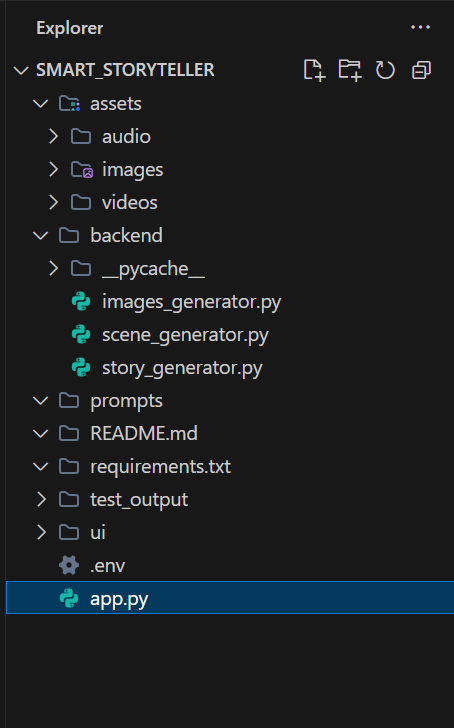
.env file has API keys of Groq and Gemini and Inside images we have a image of the APP screen(The Background)

The Below code is the WEBAPP code.

In [ ]:
# APP.py code
import streamlit as st
import base64
import os
import uuid
from dotenv import load_dotenv
from backend.story_generator import (
    generate_emotion_story,
    generate_ancestral_story,
    generate_mythology_dialogue,
    generate_cultural_story
)
from backend.images_generator import generate_images_from_story
from backend.scene_generator import create_slideshow_video

load_dotenv()

st.set_page_config(
    page_title="Smart Cultural Storyteller",
    page_icon="📜",
    layout="wide"
)

# Background setup
def set_background(image_path="assets/images/background.jpg"):
    try:
        with open(image_path, "rb") as f:
            encoded = base64.b64encode(f.read()).decode()
        st.markdown(
            f"""
            <style>
            .stApp {{
                background-image: url('data:image/jpg;base64,{encoded}');
                background-size: cover;
                background-position: center;
                background-attachment: fixed;
            }}
            </style>
            """,
            unsafe_allow_html=True
        )
    except:
        pass

set_background()

# Enhanced CSS
st.markdown("""
    <style>
    .story-container {
        background: rgba(255, 255, 255, 0.15);
        backdrop-filter: blur(10px);
        padding: 30px;
        border-radius: 15px;
        line-height: 1.8;
        margin: 20px 0;
        box-shadow: 0 8px 32px 0 rgba(31, 38, 135, 0.37);
        border: 1px solid rgba(255, 255, 255, 0.18);
        color: white;
        font-size: 1.1em;
    }
    .stVideo {
        border-radius: 10px;
        box-shadow: 0 4px 20px rgba(0,0,0,0.3);
    }
    </style>
""", unsafe_allow_html=True)

# Sidebar
st.sidebar.title("📖 Smart Cultural Storyteller")
menu = st.sidebar.radio(
    "Select a Mode",
    ["Home", "Emotion-Based Storytelling", "Ancestral Story",
     "Interactive Story", "Cultural Story"]
)

st.sidebar.markdown("---")
st.sidebar.subheader("⚙️ Settings")

story_length = st.sidebar.selectbox(
    "Story Length",
    ["short", "medium", "long", "custom"],
    index=1,
    format_func=lambda x: {
        "short": "Short (100 words)",
        "medium": "Medium (200 words)",
        "long": "Long (300 words)",
        "custom": "Custom"
    }[x]
)

custom_words = None
custom_paragraphs = None

if story_length == "custom":
    custom_words = st.sidebar.number_input("Words", 50, 500, 200, 50)
    custom_paragraphs = st.sidebar.number_input("Paragraphs", 2, 10, 4)

st.sidebar.markdown("---")
st.sidebar.subheader("🎨 Media Generation")

generate_images_enabled = st.sidebar.checkbox("Generate Images", True)
if generate_images_enabled:
    num_images = st.sidebar.slider("Number of Images", 4, 10, 6)

generate_video_enabled = st.sidebar.checkbox("Generate Video", True)
if generate_video_enabled:
    add_video_effects = st.sidebar.checkbox("Add Video Effects", True)

st.sidebar.markdown("---")
st.sidebar.info("⏱️ Generation takes 2-3 minutes")

def vertical_center():
    st.markdown("<div style='height: 8vh;'></div>", unsafe_allow_html=True)
    _, col, _ = st.columns([1, 3, 1])
    return col

def add_images_and_video(story, user_prompt=""):
    """Generate and display images and video"""

    if not generate_images_enabled and not generate_video_enabled:
        return

    st.markdown("---")

    images_b64 = []
    valid_images = []

    # Generate Images
    if generate_images_enabled:
        try:
            with st.spinner(f"🎨 Generating {num_images} images (this may take 2-3 minutes)..."):
                # Pass user prompt for better context matching
                images_b64 = generate_images_from_story(
                    story_text=story,
                    num_images=num_images,
                    user_prompt=user_prompt
                )

            valid_images = [img for img in images_b64 if img is not None]

            if valid_images:
                st.success(f"✨ Successfully generated {len(valid_images)} images!")

                st.markdown("### 🖼️ Generated Images")
                st.markdown("---")

                # Display in responsive grid
                cols_per_row = 3
                num_rows = (len(valid_images) + cols_per_row - 1) // cols_per_row

                for row in range(num_rows):
                    cols = st.columns(cols_per_row)
                    for col_idx in range(cols_per_row):
                        img_idx = row * cols_per_row + col_idx
                        if img_idx < len(valid_images):
                            with cols[col_idx]:
                                st.image(
                                    f"data:image/png;base64,{valid_images[img_idx]}",
                                    use_container_width=True,
                                    caption=f"Scene {img_idx + 1}"
                                )

                st.markdown("---")
            else:
                st.error("❌ Failed to generate images")
                return

        except Exception as e:
            st.error(f"❌ Image Generation Error: {str(e)}")
            import traceback
            st.code(traceback.format_exc())
            return

    # Generate Video
    if generate_video_enabled and valid_images:
        st.markdown("### 🎬 Creating Your Story Video...")

        progress_bar = st.progress(0)
        status_text = st.empty()

        try:
            status_text.text("🎬 Processing images...")
            progress_bar.progress(20)

            story_id = str(uuid.uuid4())[:8]

            status_text.text("🎥 Creating video with effects...")
            progress_bar.progress(50)

            video_path = create_slideshow_video(
                images_b64=valid_images,  # Use only valid images
                sid=story_id,
                story=story,
                effects=add_video_effects
            )

            progress_bar.progress(90)
            status_text.text("🎵 Adding audio narration...")

            progress_bar.progress(100)
            status_text.empty()
            progress_bar.empty()

            if video_path and os.path.exists(video_path):
                st.success("✨ Video created successfully!")

                st.markdown("### 🎥 Your Story Video")
                st.markdown("---")

                try:
                    # Display video player
                    st.video(video_path)

                    # Show video info
                    size_mb = os.path.getsize(video_path) / (1024 * 1024)
                    words = len(story.split())
                    duration = words / 3.0

                    col1, col2, col3 = st.columns(3)
                    with col1:
                        st.metric("Duration", f"{duration:.0f}s")
                    with col2:
                        st.metric("File Size", f"{size_mb:.2f} MB")
                    with col3:
                        st.metric("Images", len(valid_images))

                    st.markdown("---")

                    # Download button
                    with open(video_path, 'rb') as video_file:
                        st.download_button(
                            label="📥 Download Video",
                            data=video_file,
                            file_name=f"story_{story_id}.mp4",
                            mime="video/mp4",
                            use_container_width=True
                        )

                    st.success("🎉 Complete! Your story video is ready.")
                    st.info("💡 Tip: Click play to watch with audio narration.")

                except Exception as e:
                    st.error(f"❌ Error displaying video: {str(e)}")
            else:
                st.warning("⚠️ Video generation failed. Please try again.")

        except Exception as e:
            st.error(f"❌ Video Generation Error: {str(e)}")
            import traceback
            st.code(traceback.format_exc())

# HOME PAGE
if menu == "Home":
    with vertical_center():
        st.markdown("""
            <div style="background:rgba(0,0,0,0.75); backdrop-filter: blur(10px);
                        padding:50px; border-radius:20px; color:white; text-align:center;">
                <h1 style="font-size: 3em; margin-bottom: 20px;">📜 Smart Cultural Storyteller</h1>
                <h3 style="font-size: 1.5em; color: #FFD700; margin-bottom: 30px;">
                    AI-Powered Cultural Narratives
                </h3>
                <p style="font-size: 1.2em; line-height: 2;">
                    🎭 Emotion-based tales • 🌳 Ancestral legacy<br>
                    💬 Talk with wise friends • 📜 True history<br><br>
                    <em style="color: #FFD700; font-size: 1.1em;">
                        ✨ With AI-generated images & video narration! ✨
                    </em>
                </p>
            </div>
            """, unsafe_allow_html=True)

# EMOTION-BASED STORYTELLING
elif menu == "Emotion-Based Storytelling":
    with vertical_center():
        st.markdown("""
            <h2 style='color:white; text-align:center;
                       text-shadow: 2px 2px 4px rgba(0,0,0,0.7);'>
                🎭 Emotion-Based Storytelling
            </h2>
        """, unsafe_allow_html=True)

    emotions = ["Devotion", "Joy", "Love", "Courage", "Sadness", "Wonder", "Wisdom"]

    col1, col2 = st.columns(2)
    with col1:
        emotion = st.selectbox("Choose an Emotion", emotions)
    with col2:
        idea = st.text_area(
            "Your Story Idea (be specific!)",
            height=100,
            placeholder="E.g., 'A mother's love for her son' or 'King's devotion to Lord Jagannath'"
        )

    if st.button("✨ Generate Story ✨", use_container_width=True):
        if idea.strip():
            with st.spinner("📝 Creating your story..."):
                story = generate_emotion_story(
                    emotion, idea, story_length,
                    custom_words, custom_paragraphs
                )
                st.success(f"📖 Your {emotion} Story")
                st.markdown(f"<div class='story-container'>{story}</div>",
                          unsafe_allow_html=True)

                # Generate media with user prompt context
                add_images_and_video(story, user_prompt=idea)
        else:
            st.error("⚠️ Please enter your story idea!")

# ANCESTRAL STORY
elif menu == "Ancestral Story":
    with vertical_center():
        st.markdown("""
            <h2 style='color:white; text-align:center;
                       text-shadow: 2px 2px 4px rgba(0,0,0,0.7);'>
                🌳 Ancestral Story
            </h2>
        """, unsafe_allow_html=True)

    col1, col2 = st.columns(2)

    with col1:
        your_name = st.text_input("Your Name *", placeholder="Enter your name")
        father = st.text_input("Father's Name *", placeholder="Father's name")
        mother = st.text_input("Mother's Name *", placeholder="Mother's name")

    with col2:
        grandpa = st.text_input("Grandfather's Name", placeholder="Optional")
        grandma = st.text_input("Grandmother's Name", placeholder="Optional")
        siblings = st.text_input("Siblings", placeholder="Optional: names of siblings")

    idea = st.text_area("Additional Details", height=100,
                       placeholder="Any specific events or themes you'd like included")

    if st.button("🌿 Generate Legacy 🌿", use_container_width=True):
        if your_name and father and mother:
            with st.spinner("📝 Creating your ancestral story..."):
                story = generate_ancestral_story(
                    your_name, father, mother, grandpa, grandma,
                    siblings, idea, story_length, custom_words, custom_paragraphs
                )
                st.success("📖 Your Family Legacy")
                st.markdown(f"<div class='story-container'>{story}</div>",
                          unsafe_allow_html=True)

                # Generate media
                add_images_and_video(story, user_prompt=f"{your_name}'s family story")
        else:
            st.error("⚠️ Please fill in all required fields (marked with *)")

# INTERACTIVE FRIENDLY CONVERSATION
elif menu == "Interactive Story":
    with vertical_center():
        st.markdown("""
            <h2 style='color:white; text-align:center;
                       text-shadow: 2px 2px 4px rgba(0,0,0,0.7);'>
                💬 Talk with a Wise Friend
            </h2>
        """, unsafe_allow_html=True)

    st.markdown("""
        <div style='background:rgba(255,255,255,0.1); padding:20px; border-radius:10px; margin-bottom:20px;'>
            <p style='color:white; text-align:center; font-size:1.1em;'>
                💭 Share your problems, worries, or life questions<br>
                🕉️ Get wisdom and guidance from Krishna or Ram<br>
                💝 Like talking to a caring, wise friend
            </p>
        </div>
    """, unsafe_allow_html=True)

    if "dialogue" not in st.session_state:
        st.session_state.dialogue = {
            "started": False,
            "history": [],
            "context": "",
            "question": "",
            "correct_answer": "",
            "scenario": None
        }

    if st.button("💬 Start Conversation 💬", use_container_width=True):
        st.session_state.dialogue = {
            "started": True,
            "history": [],
            "context": "",
            "question": "",
            "correct_answer": "",
            "scenario": None
        }
        with st.spinner("💭 Your wise friend is ready to listen..."):
            response = generate_mythology_dialogue()
            if "error" in response:
                st.warning(f"Starting with default greeting...")

            # Always proceed even with error
            if "segment" in response:
                st.session_state.dialogue["history"].append(response["segment"])
                st.session_state.dialogue.update(response)
                st.rerun()

    if st.session_state.dialogue["started"]:
        scenario = st.session_state.dialogue.get("scenario")
        if scenario:
            st.info(f"🙏 You are speaking with **{scenario['wise']}** - A wise friend who understands life's challenges")

        # Display conversation history
        if st.session_state.dialogue["history"]:
            dialogue_text = "<br><br>".join(st.session_state.dialogue["history"])
            st.markdown(f"<div class='story-container'>{dialogue_text}</div>",
                       unsafe_allow_html=True)

        # Input for user's response
        if st.session_state.dialogue.get("question"):
            st.markdown("---")
            answer = st.text_area(
                "You speak:",
                height=100,
                placeholder="Share your thoughts, problems, or answer the question above...",
                key="user_answer"
            )

            col1, col2 = st.columns([3, 1])
            with col1:
                if st.button("💬 Continue Conversation", use_container_width=True):
                    if answer and answer.strip():
                        # Add user's response to history
                        st.session_state.dialogue["history"].append(f"<strong>You speak:</strong> {answer}")

                        with st.spinner("🤔 Your friend is thinking..."):
                            response = generate_mythology_dialogue(
                                st.session_state.dialogue["context"],
                                answer,
                                st.session_state.dialogue["correct_answer"],
                                st.session_state.dialogue["scenario"]
                            )

                            if "segment" in response:
                                st.session_state.dialogue["history"].append(response["segment"])
                                st.session_state.dialogue.update(response)
                                st.rerun()
                            else:
                                st.error("⚠️ Let's try that again...")
                    else:
                        st.warning("⚠️ Please share your thoughts before continuing.")

            with col2:
                if st.button("🔄 New Topic", use_container_width=True):
                    del st.session_state.dialogue
                    st.rerun()
        else:
            st.success("✅ Conversation Complete!")
            st.info("💡 Your wise friend has shared their wisdom with you.")
            if st.button("🔄 Start New Conversation", use_container_width=True):
                del st.session_state.dialogue
                st.rerun()

# CULTURAL/HISTORICAL STORY
elif menu == "Cultural Story":
    with vertical_center():
        st.markdown("""
            <h2 style='color:white; text-align:center;
                       text-shadow: 2px 2px 4px rgba(0,0,0,0.7);'>
                📜 True Cultural History
            </h2>
        """, unsafe_allow_html=True)

    col1, col2 = st.columns([2, 3])

    with col1:
        topic = st.text_input(
            "Topic/Subject",
            placeholder="E.g., Lord Jagannath,Taj Mahal..."
        )

    with col2:
        extra = st.text_area(
            "Focus/Details",
            height=100,
            placeholder="E.g., 'Focus on devotion rituals' or 'His contribution to India'"
        )

    if st.button("📜 Generate True Story 📜", use_container_width=True):
        if topic:
            with st.spinner("📝 Retrieving historical facts..."):
                story = generate_cultural_story(
                    topic, extra, story_length,
                    custom_words, custom_paragraphs
                )
                st.success("📖 True Cultural History")
                st.markdown(f"<div class='story-container'>{story}</div>",
                          unsafe_allow_html=True)

                # Generate media with full context
                full_context = f"{topic} {extra}" if extra else topic
                add_images_and_video(story, user_prompt=full_context)
        else:
            st.error("⚠️ Please enter a topic!")

# Footer
st.markdown("---")
st.markdown("""
    <div style='text-align:center; color:rgba(255,255,255,0.7);'>
        <p>🇮🇳 Preserving and Celebrating Indian Heritage 🇮🇳</p>
    </div>
""", unsafe_allow_html=True)




The Below code is the story_generator code

In [ ]:
# backend/story_generator.py
# FIXED VERSION - No more KeyError for 'segment'

import os
from pathlib import Path
from typing import Optional
from dotenv import load_dotenv
from groq import Groq
import json
import random

project_root = Path(__file__).parent.parent
load_dotenv(project_root / ".env")

GROQ_API_KEY = os.getenv("GROQ_API_KEY")
if not GROQ_API_KEY:
    raise ValueError("GROQ_API_KEY not found in .env!")

client = Groq(api_key=GROQ_API_KEY)
MODEL = "llama-3.3-70b-versatile"

MYTHOLOGY_SCENARIOS = [
    {"epic": "Ramayana", "wise": "Ram", "user_role": "Lakshman"},
    {"epic": "Mahabharata", "wise": "Krishna", "user_role": "Arjuna"},
]

def count_words(text: str) -> int:
    return len(text.split())

def generate_emotion_story(emotion: str, user_idea: Optional[str] = None,
                          length: str = "medium", custom_words: int = None,
                          custom_paragraphs: int = None) -> str:
    """Generate emotion-based story"""

    if length == "custom" and custom_words:
        target = custom_words
        paras = custom_paragraphs or 3
    elif length == "short":
        target = 100
        paras = 2
    elif length == "long":
        target = 300
        paras = 6
    else:
        target = 200
        paras = 4

    prompt = f"""Write a beautiful touching story about {emotion}.

Story Topic: {user_idea if user_idea else 'Create a story about ' + emotion}

REQUIREMENTS:
1. Write EXACTLY {target} words
2. Simple language suitable for children
3. Warm, emotional, and touching
4. Indian cultural setting
5. Make it meaningful and heartwarming

Write EXACTLY {target} words."""

    system = f"""You write beautiful emotional stories for children.
EXACTLY {target} words.
Focus on {emotion}."""

    try:
        completion = client.chat.completions.create(
            model=MODEL,
            messages=[
                {"role": "system", "content": system},
                {"role": "user", "content": prompt}
            ],
            temperature=0.7,
            max_tokens=target * 2,
        )

        story = completion.choices[0].message.content.strip()
        print(f"📊 Generated: {count_words(story)} words")
        return story

    except Exception as e:
        return f"Error generating story: {str(e)}"

def generate_ancestral_story(
    your_name: str, father_name: str, mother_name: str,
    grandfather_name: str = "", grandmother_name: str = "",
    siblings: str = "", extra_idea: str = None,
    length: str = "medium", custom_words: int = None, custom_paragraphs: int = None
) -> str:
    """Generate ancestral story"""

    if length == "custom" and custom_words:
        target = custom_words
        paras = custom_paragraphs or 3
    elif length == "short":
        target = 100
        paras = 2
    elif length == "long":
        target = 300
        paras = 6
    else:
        target = 200
        paras = 4

    nana = grandfather_name or "my Nana"
    nani = grandmother_name or "my Nani"

    prompt = f"""I am {your_name}. Write MY ancestral story (first-person).

Family:
- Father: {father_name}
- Mother: {mother_name}
- Grandfather: {nana}
- Grandmother: {nani}
{f"- Siblings: {siblings}" if siblings else ""}

REQUIREMENTS:
1. Write EXACTLY {target} words
2. Event before I was born
3. Start: "I, {your_name}, was not born yet..."
4. Indian cultural setting
5. Touching and emotional

{f"Additional Focus: {extra_idea}" if extra_idea else ""}

Write EXACTLY {target} words."""

    try:
        completion = client.chat.completions.create(
            model=MODEL,
            messages=[
                {"role": "system", "content": f"Write EXACTLY {target} words."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.6,
            max_tokens=target * 2,
        )

        story = completion.choices[0].message.content.strip()
        print(f"📊 Generated: {count_words(story)} words (ANCESTRAL)")
        return story

    except Exception as e:
        return f"Error generating story: {str(e)}"

def generate_mythology_dialogue(
    previous_context: Optional[str] = None,
    user_answer: Optional[str] = None,
    correct_answer: Optional[str] = None,
    scenario: Optional[dict] = None
) -> dict:
    """Interactive friendly dialogue - Like talking with a wise friend"""

    try:
        if scenario is None:
            scenario = random.choice(MYTHOLOGY_SCENARIOS)

        wise = scenario["wise"]
        user_role = scenario["user_role"]
        epic = scenario["epic"]

        if user_answer is None:
            # Starting new dialogue - Ask about user's problem
            prompt = f"""You are {wise} from {epic}, speaking as a caring friend to help someone with their life problems.

Start a warm, friendly conversation:
1. Greet warmly and ask what problem or worry they have
2. Be compassionate and understanding like a close friend
3. DON'T ask about war, battles, or epic stories
4. Ask about REAL LIFE problems: family issues, career confusion, relationship problems, self-doubt, difficult decisions, etc.
5. Keep it conversational and natural (about 60-80 words)

Format your response as a natural dialogue:
"{wise} speaks: [Your warm greeting and question about their problem]"

You MUST respond ONLY with valid JSON in this exact format:
{{
  "segment": "{wise} speaks: Your full dialogue here",
  "question": "What personal problem or worry do you have?",
  "correct_answer": "any life problem",
  "context": "Starting friendly conversation"
}}

IMPORTANT: Write "{wise} speaks:" not "Arjuna speaks" or any other name."""
        else:
            # Continuing dialogue - Help with their problem
            prompt = f"""Continue as {wise}, helping your friend with their problem.

Previous context: {previous_context}
Their problem/response: {user_answer}

Now respond as a wise, caring friend:
1. Acknowledge their problem with empathy
2. Share relevant wisdom from your experiences
3. Give practical, helpful advice
4. Ask a follow-up question to understand better or help them think deeper
5. Be supportive and encouraging (about 80-100 words)
6. NO questions about war or battles - focus on their PERSONAL LIFE issue

Format: "{wise} speaks: [Your empathetic response and advice]"

You MUST respond ONLY with valid JSON:
{{
  "segment": "{wise} speaks: Your complete caring response here",
  "question": "A thoughtful follow-up question about their problem",
  "correct_answer": "any reasonable response",
  "context": "Updated summary of the conversation"
}}

IMPORTANT: Always write "{wise} speaks:" at the start."""

        completion = client.chat.completions.create(
            model=MODEL,
            messages=[
                {"role": "system", "content": f"You are {wise}, a wise and caring friend helping someone with life problems. Respond ONLY with valid JSON. Use '{wise} speaks:' format."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.8,
            max_tokens=600
        )

        text = completion.choices[0].message.content.strip()

        # Clean JSON formatting
        text = text.replace('```json', '').replace('```', '').strip()

        # Parse JSON
        result = json.loads(text)

        # CRITICAL FIX: Ensure 'segment' always exists and has correct format
        if "segment" not in result:
            if "dialogue" in result:
                result["segment"] = result["dialogue"]
            elif "response" in result:
                result["segment"] = result["response"]
            else:
                result["segment"] = f"{wise} speaks: " + text[:200] + "..."

        # Ensure segment starts with correct format
        if not result["segment"].startswith(f"{wise} speaks:"):
            result["segment"] = f"{wise} speaks: " + result["segment"]

        # Ensure all required keys exist
        result.setdefault("question", "How can I help you further?")
        result.setdefault("correct_answer", "any response")
        result.setdefault("context", "Friendly conversation")
        result["scenario"] = scenario

        print(f"✅ Dialogue generated successfully")
        return result

    except json.JSONDecodeError as e:
        print(f"❌ JSON Error: {e}")
        wise_name = scenario.get('wise', 'Krishna') if scenario else 'Krishna'
        return {
            "segment": f"{wise_name} speaks: Greetings, my friend! I sense you have something weighing on your heart. Please, share with me - what troubles you today?",
            "question": "What problem or worry is on your mind?",
            "correct_answer": "any problem",
            "context": "Beginning friendly conversation",
            "scenario": scenario or MYTHOLOGY_SCENARIOS[0],
            "error": "JSON parsing failed"
        }
    except Exception as e:
        print(f"❌ Dialogue Error: {e}")
        wise_name = scenario.get('wise', 'Krishna') if scenario else 'Krishna'
        return {
            "segment": f"{wise_name} speaks: I'm here to listen and help, my friend. What's troubling you?",
            "question": "What would you like guidance on?",
            "correct_answer": "any issue",
            "context": "Starting conversation",
            "scenario": scenario or MYTHOLOGY_SCENARIOS[0],
            "error": str(e)
        }

def generate_cultural_story(topic: str, user_idea: str = None,
                           length: str = "medium", custom_words: int = None,
                           custom_paragraphs: int = None) -> str:
    """Generate cultural/historical story"""

    if length == "custom" and custom_words:
        target = custom_words
        paras = custom_paragraphs or 3
    elif length == "short":
        target = 100
        paras = 2
    elif length == "long":
        target = 300
        paras = 6
    else:
        target = 200
        paras = 4

    prompt = f"""Write a story about {topic}.

{f"Focus on: {user_idea}" if user_idea else ""}

REQUIREMENTS:
1. Write EXACTLY {target} words
2. Include cultural or historical context
3. Make it informative and engaging
4. Indian cultural setting
5. Educational and meaningful

Write EXACTLY {target} words."""

    try:
        completion = client.chat.completions.create(
            model=MODEL,
            messages=[
                {"role": "system", "content": f"Write cultural stories. EXACTLY {target} words."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.5,
            max_tokens=target * 2,
        )

        story = completion.choices[0].message.content.strip()
        print(f"📊 Generated: {count_words(story)} words (Cultural)")
        return story

    except Exception as e:
        return f"Error generating story: {str(e)}"

The Below code is images_generator Code

In [ ]:
# backend/images_generator.py
# ULTRA DETAILED - Extracts exact characters, genders, and details from prompt and story

import os
import requests
import base64
from pathlib import Path
import time
import random
import re

class ImageGenerator:
    def __init__(self):
        self.images_dir = Path("assets/images/generated")
        self.images_dir.mkdir(parents=True, exist_ok=True)
        self.session_id = int(time.time()) + random.randint(0, 9999)

    def extract_characters_and_details(self, user_prompt: str, story_text: str) -> dict:
        """
        Extract EXACT character details including gender, names, roles
        """
        combined_text = (user_prompt + " " + story_text).lower()

        characters = []

        # Male characters - SPECIFIC names and descriptions
        male_patterns = {
            'Krishna': ['krishna', 'shri krishna', 'shree krishna', 'lord krishna'],
            'Arjun': ['arjun', 'arjuna', 'arjuna warrior'],
            'Ram': ['ram', 'rama', 'lord ram', 'shri ram'],
            'Lakshman': ['lakshman', 'laxman', 'lakshmana'],
            'Hanuman': ['hanuman', 'pawan putra'],
            'Ravan': ['ravan', 'ravana', 'demon king'],
            'Bheem': ['bheem', 'bheema', 'bhima'],
            'Yudhishthir': ['yudhishthir', 'yudhishthira'],
            'Karna': ['karna'],
            'father': ['father', 'dad', 'papa', 'pita'],
            'grandfather': ['grandfather', 'dada', 'nana', 'grandpa'],
            'brother': ['brother', 'bhai'],
            'son': ['son', 'beta', 'boy child'],
            'boy': ['boy', 'young boy', 'male child'],
            'friend_male': ['two boys', 'boy friends', 'male friends'],
            'king': ['king', 'raja', 'emperor'],
        }

        # Female characters - SPECIFIC names and descriptions
        female_patterns = {
            'Sita': ['sita', 'sita devi', 'mata sita'],
            'Draupadi': ['draupadi', 'panchali'],
            'Radha': ['radha', 'radha rani'],
            'Kunti': ['kunti', 'kunti devi'],
            'mother': ['mother', 'mom', 'maa', 'mata'],
            'grandmother': ['grandmother', 'dadi', 'nani', 'grandma'],
            'sister': ['sister', 'bahen', 'didi'],
            'daughter': ['daughter', 'beti', 'girl child'],
            'girl': ['girl', 'young girl', 'female child'],
            'friend_female': ['two girls', 'girl friends', 'female friends'],
            'queen': ['queen', 'rani'],
        }

        # Detect male characters
        for name, patterns in male_patterns.items():
            for pattern in patterns:
                if pattern in combined_text:
                    characters.append({
                        'name': name,
                        'gender': 'male',
                        'description': self.get_character_description(name, 'male')
                    })
                    break

        # Detect female characters
        for name, patterns in female_patterns.items():
            for pattern in patterns:
                if pattern in combined_text:
                    characters.append({
                        'name': name,
                        'gender': 'female',
                        'description': self.get_character_description(name, 'female')
                    })
                    break

        # Remove duplicates
        seen_names = set()
        unique_chars = []
        for char in characters:
            if char['name'] not in seen_names:
                seen_names.add(char['name'])
                unique_chars.append(char)

        return {
            'characters': unique_chars,
            'main_topic': user_prompt.strip(),
            'combined_text': combined_text
        }

    def get_character_description(self, name: str, gender: str) -> str:
        """
        Get VERY SPECIFIC visual description for each character
        MUST look exactly like the real/mythological figure
        """
        descriptions = {
            # Male mythology characters - EXACT iconic appearance
            'Krishna': 'Lord Krishna with BLUE SKIN COLOR, peacock feather in crown on head, yellow silk dhoti, holding bamboo flute, divine radiant smile, male god with dark blue complexion, traditional Indian deity appearance',
            'Arjun': 'Arjuna the warrior prince, strong athletic male warrior, silver armor and warrior clothes, holding large bow with arrows on back, headband, brave determined face, male Pandava hero',
            'Ram': 'Lord Rama with BLUE SKIN COLOR, bow and quiver of arrows, golden crown, royal yellow dhoti, calm noble face, male prince deity with dark blue complexion',
            'Lakshman': 'Lakshmana, loyal brother warrior, male with armor, holding bow, traditional warrior dress, devoted expression, strong male companion',
            'Hanuman': 'Hanuman the monkey god, RED-ORANGE BODY, muscular monkey face and tail, male monkey deity with devotional pose, powerful build',
            'Ravan': 'Ravana demon king with TEN HEADS stacked vertically, golden crown on each head, fierce demonic face, male demon with dark complexion, multiple arms',
            'Bheem': 'Bheema the strongest Pandava, VERY MUSCULAR male warrior, holding large mace weapon, massive build, powerful physique, warrior clothes',
            'Karna': 'Karna the tragic hero, male archer warrior, GOLDEN KAVACH ARMOR covering chest, earrings, bow and arrows, noble warrior appearance',

            # Male family members
            'father': 'Indian father, adult male, traditional kurta pajama, caring expression, male parent',
            'grandfather': 'Indian grandfather, elderly male, white beard, traditional dhoti or kurta, wise old man',
            'brother': 'young Indian boy, brother, traditional clothes, male sibling',
            'son': 'young Indian boy child, son, traditional clothes for boys, male child',
            'boy': 'young Indian boy, male child, simple traditional clothes, playful boy',
            'friend_male': 'two young Indian boys, male friends, traditional boys clothes, playing together',
            'king': 'Indian king, adult male, royal crown, royal robes, regal male ruler',

            # Female mythology characters - EXACT iconic appearance
            'Sita': 'Sita Devi, beautiful Indian goddess, elegant RED AND GOLD SAREE, flower jewelry in hair, gentle serene face, divine female appearance, traditional goddess look',
            'Draupadi': 'Draupadi the fire-born queen, beautiful strong Indian woman, DARK LONG HAIR, royal colorful saree, gold jewelry, fierce intelligent eyes, female Panchal princess',
            'Radha': 'Radha Rani, beautiful devoted goddess, BLUE OR PINK SAREE, flower garlands, loving expression toward Krishna, elegant female deity',
            'Kunti': 'Kunti Devi the queen mother, mature graceful Indian woman, royal saree, motherly wise face, traditional jewelry, elderly female queen',

            # Female family members
            'mother': 'Indian mother, adult woman, beautiful saree, caring expression, female parent, maternal look',
            'grandmother': 'Indian grandmother, elderly woman, white hair, traditional saree, wise old woman',
            'sister': 'young Indian girl, sister, traditional dress or salwar, female sibling',
            'daughter': 'young Indian girl child, daughter, traditional girls dress, female child',
            'girl': 'young Indian girl, female child, traditional dress, playful girl',
            'friend_female': 'two young Indian girls, female friends, traditional girls clothes, playing together',
            'queen': 'Indian queen, adult woman, royal crown, royal saree, jewelry, regal female ruler',
        }

        return descriptions.get(name, f'{name}, {gender} character, traditional Indian appearance')

    def create_ultra_detailed_prompts(self, user_prompt: str, story_text: str, num_images: int) -> list:
        """
        Create EXTREMELY detailed prompts with exact character descriptions
        """

        # Extract characters
        details = self.extract_characters_and_details(user_prompt, story_text)
        characters = details['characters']
        main_topic = details['main_topic']

        print(f"\n   🔍 DETECTED CHARACTERS:")
        if characters:
            for char in characters:
                print(f"      • {char['name']} ({char['gender']})")
        else:
            print(f"      • No specific characters - using general scene")

        # Build character description string
        if len(characters) >= 2:
            # Multiple characters
            char_desc = f"{characters[0]['description']} with {characters[1]['description']}"
        elif len(characters) == 1:
            # Single character
            char_desc = characters[0]['description']
        else:
            # No specific characters - use topic directly
            char_desc = main_topic

        print(f"   📝 Character Description: {char_desc[:80]}...")

        # Art style
        art_style = "colorful children's storybook illustration, detailed cartoon art style, warm bright colors, hand-drawn look, Indian cultural setting, clear and expressive"

        prompts = []

        for i in range(num_images):
            if i == 0:
                # Scene 1: Establishing shot
                prompt = f"{main_topic}. Showing {char_desc} clearly. {art_style}. Main establishing scene with all characters visible and properly depicted."

            elif i == 1:
                # Scene 2: Close-up
                prompt = f"{main_topic}. Close-up of {char_desc} with detailed faces. {art_style}. Emotional expressions, accurate character depiction, clear gender representation."

            elif i == 2:
                # Scene 3: Full scene
                prompt = f"{main_topic}. Full scene showing {char_desc} in traditional Indian setting. {art_style}. Complete background, accurate character appearance, proper clothing."

            elif i == 3:
                # Scene 4: Interaction
                prompt = f"{main_topic}. {char_desc} interacting together. {art_style}. Clear interaction between characters, accurate depiction of each person, proper gender and appearance."

            elif i == 4:
                # Scene 5: Different angle
                prompt = f"{main_topic}. Different perspective showing {char_desc}. {art_style}. Alternative view, maintaining accurate character details and gender representation."

            else:  # i == 5 or more
                # Scene 6: Emotional moment
                prompt = f"{main_topic}. Emotional meaningful moment with {char_desc}. {art_style}. Touching scene, accurate character portrayal, proper representation of all individuals."

            # Add gender reinforcement for clarity
            if characters:
                genders = [c['gender'] for c in characters]
                gender_note = f" IMPORTANT: Show {' and '.join(genders)} characters as described - maintain accurate gender representation."
                prompt += gender_note

            prompts.append(prompt)

        return prompts[:num_images]

    def generate_single_image(self, prompt: str, scene_num: int) -> str:
        """Generate one image with detailed prompt"""

        print(f"  🎨 Image {scene_num}...", end=" ")

        try:
            from urllib.parse import quote

            # Encode the full detailed prompt
            encoded_prompt = quote(prompt)

            # Create seed for variety
            seed = (self.session_id + scene_num * 12345) % 999999

            # Pollinations AI URL
            url = f"https://image.pollinations.ai/prompt/{encoded_prompt}?width=1024&height=1024&seed={seed}&nologo=true&model=flux"

            # Make request
            response = requests.get(url, timeout=90)

            if response.status_code == 200:
                content_length = len(response.content)

                if content_length > 15000:
                    # Save to file
                    filename = f"scene_{scene_num:02d}.png"
                    filepath = self.images_dir / filename

                    with open(filepath, 'wb') as f:
                        f.write(response.content)

                    # Convert to base64
                    img_b64 = base64.b64encode(response.content).decode('utf-8')

                    size_kb = content_length / 1024
                    print(f"✅ ({size_kb:.0f} KB)")

                    return img_b64
                else:
                    print(f"❌ Too small")
                    return None
            else:
                print(f"❌ Status {response.status_code}")
                return None

        except Exception as e:
            print(f"❌ Error")
            return None

    def generate_images_from_story(self, story_text: str, num_images: int = 6,
                                   user_prompt: str = "") -> list:
        """
        Generate images with EXACT character details
        """

        print(f"\n{'='*70}")
        print(f"🎨 ULTRA-DETAILED IMAGE GENERATION")
        print(f"{'='*70}")
        print(f"   Topic: '{user_prompt}'")
        print(f"   Images: {num_images}")

        if not user_prompt or not user_prompt.strip():
            user_prompt = "Indian cultural scene"
            print(f"   ⚠️  No topic given, using default")

        # Create ultra-detailed prompts
        print(f"\n📝 Analyzing story for character details...")
        prompts = self.create_ultra_detailed_prompts(user_prompt, story_text, num_images)

        # Generate images
        print(f"\n🎨 Generating {num_images} images with detailed character descriptions...")
        print(f"{'='*70}\n")

        images = []

        for i in range(num_images):
            img = self.generate_single_image(prompts[i], i + 1)
            images.append(img)

            if i < num_images - 1:
                print(f"  ⏳ Waiting 7 seconds...\n")
                time.sleep(7)

        # Count success
        successful = sum(1 for img in images if img is not None)
        failed_count = num_images - successful

        print(f"\n{'='*70}")
        print(f"📊 RESULTS:")
        print(f"   ✅ Successful: {successful}/{num_images}")
        if failed_count > 0:
            print(f"   ❌ Failed: {failed_count}/{num_images}")
        print(f"{'='*70}")

        # Retry failed once
        failed_indices = [i for i, img in enumerate(images) if img is None]

        if failed_indices and successful > 0:
            print(f"\n♻️  Retrying {len(failed_indices)} failed...\n")

            for idx in failed_indices:
                img = self.generate_single_image(prompts[idx], idx + 1)
                if img:
                    images[idx] = img
                time.sleep(7)

        final = sum(1 for img in images if img is not None)

        print(f"\n{'='*70}")
        print(f"✅ FINAL: {final}/{num_images} images")
        print(f"{'='*70}\n")

        return images


def generate_images_from_story(story_text: str, num_images: int = 6,
                               user_prompt: str = "") -> list:
    """Generate images with exact character details"""
    try:
        generator = ImageGenerator()
        return generator.generate_images_from_story(story_text, num_images, user_prompt)
    except Exception as e:
        print(f"\n❌ ERROR: {str(e)}")
        import traceback
        traceback.print_exc()
        return [None] * num_images

The Below code is scene_generator Code

In [ ]:
# backend/scene_generator.py
# FASTER VERSION - Quicker TTS speech for shorter videos

import cv2
import numpy as np
from pathlib import Path
import base64
from PIL import Image
import io
import os
import re
import subprocess

try:
    from gtts import gTTS
    TTS_OK = True
except:
    TTS_OK = False

class VideoGenerator:
    def __init__(self):
        self.videos_dir = Path("assets/videos")
        self.videos_dir.mkdir(parents=True, exist_ok=True)
        self.audio_dir = Path("assets/audio")
        self.audio_dir.mkdir(parents=True, exist_ok=True)

        self.fps = 30
        self.size = (1280, 720)

    def b64_to_img(self, b64):
        """Convert base64 to numpy array"""
        try:
            if not b64:
                return None
            data = base64.b64decode(b64)
            img = Image.open(io.BytesIO(data))
            img = img.convert('RGB')
            arr = np.array(img)
            print(f"    ✓ Decoded: {arr.shape}")
            return arr
        except Exception as e:
            print(f"    ✗ Decode failed: {e}")
            return None

    def resize_for_video(self, img):
        """Resize image maintaining aspect ratio"""
        try:
            h, w = img.shape[:2]
            target_w, target_h = self.size

            # Calculate scaling
            scale = min(target_w / w, target_h / h)
            new_w = int(w * scale)
            new_h = int(h * scale)

            # Resize
            resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LANCZOS4)

            # Create canvas and center image
            canvas = np.zeros((target_h, target_w, 3), dtype=np.uint8)
            x_offset = (target_w - new_w) // 2
            y_offset = (target_h - new_h) // 2
            canvas[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized

            # Convert RGB to BGR for OpenCV
            canvas = cv2.cvtColor(canvas, cv2.COLOR_RGB2BGR)

            print(f"    ✓ Resized to {self.size}")
            return canvas
        except Exception as e:
            print(f"    ✗ Resize failed: {e}")
            return None

    def create_fade(self, img1, img2, frames):
        """Smooth fade transition"""
        result = []
        for i in range(frames):
            alpha = i / frames
            blend = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0)
            result.append(blend)
        return result

    def create_zoom(self, img, frames):
        """Ken Burns effect"""
        result = []
        h, w = img.shape[:2]

        for i in range(frames):
            progress = i / frames
            zoom = 1 + 0.08 * progress

            crop_w = int(w / zoom)
            crop_h = int(h / zoom)

            x = int((w - crop_w) * progress * 0.5)
            y = int((h - crop_h) * progress * 0.5)

            x = max(0, min(x, w - crop_w))
            y = max(0, min(y, h - crop_h))

            cropped = img[y:y+crop_h, x:x+crop_w]
            zoomed = cv2.resize(cropped, (w, h), interpolation=cv2.INTER_LINEAR)
            result.append(zoomed)

        return result

    def calculate_duration_smart(self, story: str, num_images: int) -> tuple:
        """
        FASTER CALCULATION - Normal speech speed for shorter videos
        Returns: (total_duration, time_per_image)
        """
        words = len(story.split())

        # NORMAL/FAST reading speed - 3.5 words per second
        # This gives natural-sounding but not slow speech
        words_per_second = 3.5

        # Calculate time needed to read story at normal speed
        time_for_full_story = words / words_per_second

        # Add only 10% buffer (less than before)
        total_duration = time_for_full_story * 1.1

        # Ensure minimum 3 seconds per image (reduced from 4)
        min_per_image = 3
        min_total_from_images = num_images * min_per_image

        # Use MAXIMUM of both
        if total_duration < min_total_from_images:
            total_duration = min_total_from_images

        # Calculate time per image
        time_per_image = total_duration / num_images

        print(f"\n   📊 VIDEO TIMING (FASTER):")
        print(f"   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
        print(f"   Story: {words} words")
        print(f"   Reading speed: {words_per_second} words/second (NORMAL)")
        print(f"   Time to read: {time_for_full_story:.1f} seconds")
        print(f"   Buffer (10%): +{time_for_full_story * 0.1:.1f} seconds")
        print(f"   Total duration: {total_duration:.1f} seconds")
        print(f"   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
        print(f"   Images: {num_images}")
        print(f"   Time per image: {time_per_image:.1f} seconds")
        print(f"   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

        return (total_duration, time_per_image)

    def generate_audio(self, story: str, sid: str):
        """Generate TTS audio with NORMAL SPEED (not slow)"""
        if not TTS_OK:
            print("   ⚠️  gTTS not installed - Please install: pip install gtts")
            return None

        try:
            print("\n   🎤 GENERATING AUDIO (NORMAL SPEED)...")
            print("   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

            # Clean text
            clean = re.sub(r'\s+', ' ', story).strip()

            path = self.audio_dir / f"audio_{sid}.mp3"

            words = len(clean.split())
            print(f"   Words: {words}")
            print(f"   Creating NORMAL SPEED speech...")

            # Use slow=False for NORMAL/FASTER speech
            # This makes videos shorter
            tts = gTTS(text=clean, lang='en', slow=False)
            tts.save(str(path))

            if os.path.exists(path):
                size = os.path.getsize(path) / 1024
                # Estimate duration with normal speed
                estimated_duration = words / 3.5  # Normal = 3.5 words/second
                print(f"   ✅ Audio: {size:.1f} KB")
                print(f"   ✅ Estimated: ~{estimated_duration:.0f} seconds")
                print(f"   ✅ Speed: NORMAL (faster videos)")
                print("   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
                return str(path)
            else:
                print(f"   ❌ Audio file not created")
                return None

        except Exception as e:
            print(f"   ❌ Audio error: {e}")
            print(f"   💡 Install: pip install gtts")
            return None

    def merge_audio(self, video_path: str, audio_path: str) -> bool:
        """Merge audio using FFmpeg"""
        try:
            print("   🎵 Merging audio...")

            output = video_path.replace('.mp4', '_with_audio.mp4')

            # FFmpeg command
            cmd = [
                'ffmpeg', '-y', '-loglevel', 'error',
                '-i', video_path,
                '-i', audio_path,
                '-c:v', 'libx264',
                '-preset', 'fast',
                '-crf', '22',
                '-c:a', 'aac',
                '-b:a', '192k',
                '-shortest',
                '-movflags', '+faststart',
                output
            ]

            result = subprocess.run(cmd, capture_output=True, timeout=180)

            if result.returncode == 0 and os.path.exists(output):
                os.remove(video_path)
                os.rename(output, video_path)
                print("   ✅ Audio merged!")
                return True
            else:
                error = result.stderr.decode() if result.stderr else "Unknown"
                print(f"   ❌ FFmpeg failed: {error}")
                return False

        except FileNotFoundError:
            print("   ❌ FFmpeg not installed")
            return False
        except Exception as e:
            print(f"   ❌ Audio merge error: {e}")
            return False

    def create_slideshow_video(self, images_b64, sid, story=None, effects=True):
        """Create FASTER video with normal speed narration"""

        print(f"\n{'='*60}")
        print(f"🎬 CREATING VIDEO (FASTER)")
        print(f"{'='*60}\n")

        print(f"📥 Received {len(images_b64)} images")

        # Process images
        processed = []
        for i, b64 in enumerate(images_b64, 1):
            if b64:
                print(f"\n  Processing image {i}:")
                img_arr = self.b64_to_img(b64)
                if img_arr is not None:
                    resized = self.resize_for_video(img_arr)
                    if resized is not None:
                        processed.append(resized)
                        print(f"  ✓ Image {i} ready")

        if not processed:
            print("\n✗ No images processed")
            return None

        print(f"\n✓ {len(processed)} images ready\n")

        # FASTER timing calculation
        if story:
            total_dur, per_image = self.calculate_duration_smart(story, len(processed))
        else:
            total_dur = len(processed) * 4
            per_image = 4
            print(f"   ⏱️  Default: {per_image:.1f}s per image")

        # Generate FAST audio
        audio_path = None
        actual_audio_duration = None

        if story and TTS_OK:
            audio_path = self.generate_audio(story, sid)

            if audio_path and os.path.exists(audio_path):
                try:
                    # Get actual audio duration
                    import subprocess
                    result = subprocess.run(
                        ['ffprobe', '-v', 'error', '-show_entries',
                         'format=duration', '-of',
                         'default=noprint_wrappers=1:nokey=1', audio_path],
                        capture_output=True,
                        text=True,
                        timeout=10
                    )
                    if result.returncode == 0:
                        actual_audio_duration = float(result.stdout.strip())
                        print(f"\n   🎵 Audio: {actual_audio_duration:.1f}s")

                        # Match video to audio
                        total_dur = actual_audio_duration + 0.5
                        per_image = total_dur / len(processed)

                        print(f"   🎬 Video adjusted:")
                        print(f"   Duration: {total_dur:.1f}s")
                        print(f"   Per image: {per_image:.1f}s")
                except:
                    print(f"   ℹ️  Using calculated time")
                    pass

        # Create video
        video_file = f"story_{sid}.mp4"
        video_path = self.videos_dir / video_file

        print(f"\n🎥 Writing video...\n")

        # H.264 codec
        fourcc = cv2.VideoWriter_fourcc(*'avc1')
        writer = cv2.VideoWriter(
            str(video_path),
            fourcc,
            self.fps,
            self.size,
            isColor=True
        )

        if not writer.isOpened():
            print("   ⚠️  Trying fallback...")
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            writer = cv2.VideoWriter(str(video_path), fourcc, self.fps, self.size, isColor=True)

        if not writer.isOpened():
            print("✗ Video writer failed")
            return None

        # Calculate frames
        frames_per_image = int(per_image * self.fps)
        transition_frames = int(0.4 * self.fps) if effects else 0  # Shorter transitions

        print(f"   ⏱️  Per image: {per_image:.1f}s")
        print(f"   🎞️  Frames: {frames_per_image}")
        if effects:
            print(f"   🔄 Transitions: {transition_frames}")
        print()

        total_frames = 0

        # Write frames
        for idx, img in enumerate(processed):
            print(f"  📹 Image {idx+1}/{len(processed)}...")

            if effects:
                frames = self.create_zoom(img, frames_per_image)
            else:
                frames = [img] * frames_per_image

            for frame in frames:
                writer.write(frame)
                total_frames += 1

            print(f"  ✓ {len(frames)} frames")

            # Transitions
            if idx < len(processed) - 1 and effects and transition_frames > 0:
                trans_frames = self.create_fade(img, processed[idx+1], transition_frames)
                for frame in trans_frames:
                    writer.write(frame)
                    total_frames += 1
                print(f"  ✓ Transition ({transition_frames})")

        writer.release()
        cv2.destroyAllWindows()

        # Verify
        if not os.path.exists(video_path):
            print("\n✗ Video not created")
            return None

        size_bytes = os.path.getsize(video_path)
        if size_bytes < 1000:
            print(f"\n✗ Too small: {size_bytes} bytes")
            return None

        duration = total_frames / self.fps
        size_mb = size_bytes / (1024 * 1024)

        print(f"\n✅ Video created:")
        print(f"   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
        print(f"   Duration: {duration:.1f}s")
        print(f"   Size: {size_mb:.2f} MB")
        print(f"   Frames: {total_frames}")
        print(f"   Images: {len(processed)}")

        if story:
            words = len(story.split())
            print(f"   Words: {words}")
            print(f"   ✅ FASTER video (normal speech)")

        print(f"   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

        # Merge audio
        audio_merged = False
        if audio_path and os.path.exists(audio_path):
            print(f"\n   🎵 Audio: {audio_path}")
            audio_merged = self.merge_audio(str(video_path), audio_path)

            if audio_merged:
                print(f"   ✅ Audio merged!")
            else:
                print(f"   ⚠️  Audio merge failed")
        else:
            if story:
                print(f"   ⚠️  No audio")
            else:
                print(f"   ℹ️  Silent video")

        print(f"\n{'='*60}")
        print(f"✨ COMPLETE!")
        print(f"   Images: {len(processed)}")
        print(f"   Audio: {'✅ MERGED (FAST)' if audio_merged else '❌ SKIPPED'}")
        print(f"   File: {video_file}")
        print(f"{'='*60}\n")

        return str(video_path)


def create_slideshow_video(images_b64, sid, story=None, effects=True):
    """Create faster slideshow video"""
    try:
        gen = VideoGenerator()
        return gen.create_slideshow_video(images_b64, sid, story, effects)
    except Exception as e:
        print(f"✗ Video error: {e}")
        import traceback
        traceback.print_exc()
        return None